### IMPORTS

In [73]:
import sys
import os
sys.executable

'c:\\Users\\luisb\\AppData\\Local\\Programs\\Python\\Python312\\python.exe'

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [75]:
SAVE_PATH = "../saves/"

In [76]:
def get_pareto_old(arr):
    # Convert the array to a numpy array
    arr_np = np.array(arr)

    # Initialize a boolean mask to keep track of pareto-efficient elements
    is_pareto_efficient = np.ones(arr_np.shape[0], dtype=bool)

    for i in range(arr_np.shape[0]):
        if is_pareto_efficient[i]:
            for j in range(arr_np.shape[0]):
                if j != i and is_pareto_efficient[j]:
                    # Check if arr[i] dominates arr[j] in all dimensions
                    if np.all(arr_np[i] <= arr_np[j]) and np.any(arr_np[i] < arr_np[j]):
                        is_pareto_efficient[j] = False

    # Return the pareto-efficient elements
    return is_pareto_efficient
    

In [77]:
def get_pareto(arr):
    # Convert the array to a numpy array
    arr_np = np.array(arr)

    # Initialize a boolean mask to keep track of pareto-efficient elements
    is_pareto_efficient = np.ones(arr_np.shape[0], dtype=bool)

    for i in range(arr_np.shape[0]):
        if is_pareto_efficient[i]:
            # Compare the current element with all other elements using broadcasting
            is_dominated = np.all(arr_np[i] <= arr_np, axis=1) & np.any(arr_np[i] < arr_np, axis=1)
            # Update the mask to mark dominated elements as False
            is_pareto_efficient[is_dominated] = False

    # Return the pareto-efficient elements
    return is_pareto_efficient

### Visualization

In [78]:
print(os.listdir(SAVE_PATH))
savefile = os.listdir(SAVE_PATH)[-1]
"Visualizing data from: " + savefile

['pareto.csv', 'paretocopy.csv', 'saves_1710502540563.csv', 'saves_1710502616293.csv', 'saves_1710502702203.csv', 'saves_1710502795933.csv', 'saves_1710513923401.csv', 'saves_1710514182799.csv', 'saves_1710514219897.csv', 'saves_1710514418808.csv', 'saves_1710514601277.csv', 'saves_1710514689193.csv', 'saves_1710514832352.csv', 'saves_1710515003559.csv', 'saves_1710515295123.csv', 'saves_1710515637176.csv', 'saves_1710519955596.csv', 'saves_1710520847852.csv', 'saves_1710521962273.csv', 'saves_1710522481507.csv', 'saves_1710602450026.csv', 'saves_1710602958295.csv', 'saves_1710606866197.csv', 'saves_1710606945986.csv', 'saves_1710607037671.csv', 'saves_1710607065032.csv', 'saves_1710607080185.csv', 'saves_1710607091912.csv', 'saves_1710607116548.csv', 'saves_1710607213876.csv', 'saves_1710607333313.csv', 'saves_1710607415357.csv', 'saves_1710607518682.csv', 'saves_1710607528073.csv', 'saves_1710607589130.csv', 'saves_1710607614696.csv', 'saves_1710607742966.csv']


'Visualizing data from: saves_1710607742966.csv'

In [79]:
# Read CSV
contracts = pd.read_csv(SAVE_PATH+savefile, sep=';')
contracts.drop_duplicates(inplace=True)
print(contracts.shape)
contracts.head()

(8420, 4)


,utilA,utilB,utilSum,contract
0,10327,9654,19981,"[1,0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,1..."
1,10253,9686,19939,"[2,1,0,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,1..."
2,10426,9629,20055,"[4,1,2,3,0,5,6,7,8,9,10,11,12,13,14,15,16,17,1..."
3,10325,9619,19944,"[6,1,2,3,4,5,0,7,8,9,10,11,12,13,14,15,16,17,1..."
4,10172,9676,19848,"[7,1,2,3,4,5,6,0,8,9,10,11,12,13,14,15,16,17,1..."


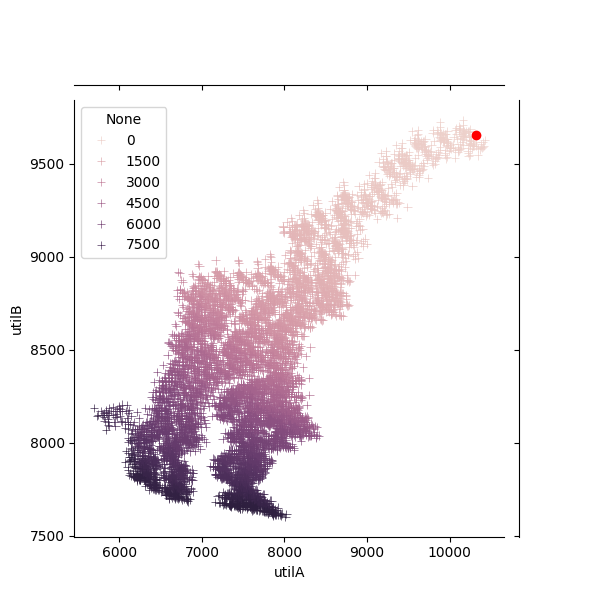

In [80]:
if "pareto" in contracts.columns and np.all(~contracts["pareto"].isna()):
    sns.jointplot(data=contracts, x="utilA", y="utilB", kind='scatter', hue="pareto", marker="+")
    plt.scatter(contracts.loc[0,"utilA"], contracts.loc[0,"utilB"], color='red', marker="+")
else:
    sns.jointplot(data=contracts, x="utilA", y="utilB", kind='scatter', hue=contracts.index, marker="+")
    plt.scatter(contracts.loc[0,"utilA"], contracts.loc[0,"utilB"], color='red')

In [81]:
# Determine pareto-efficient contracts if necessary
if "pareto" not in contracts.columns or np.any(contracts["pareto"].isna()):
    contracts["pareto"] = get_pareto(contracts[["utilA","utilB"]])
    contracts = contracts.drop_duplicates()
    contracts.to_csv(SAVE_PATH+savefile, sep=';', index=False)
contracts

,utilA,utilB,utilSum,contract,pareto
0,10327,9654,19981,"[1,0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,1...",False
1,10253,9686,19939,"[2,1,0,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,1...",False
2,10426,9629,20055,"[4,1,2,3,0,5,6,7,8,9,10,11,12,13,14,15,16,17,1...",False
3,10325,9619,19944,"[6,1,2,3,4,5,0,7,8,9,10,11,12,13,14,15,16,17,1...",False
4,10172,9676,19848,"[7,1,2,3,4,5,6,0,8,9,10,11,12,13,14,15,16,17,1...",False
...,...,...,...,...,...
8415,7212,7677,14889,"[188,1,2,3,161,5,199,7,8,9,77,11,129,138,14,16...",True
8416,7461,7646,15107,"[188,1,2,3,161,5,199,7,8,9,77,11,129,138,14,16...",True
8417,7350,7656,15006,"[188,1,2,3,161,5,199,7,8,9,77,11,129,138,14,16...",True
8418,7422,7654,15076,"[188,1,2,3,161,5,199,7,8,9,77,11,129,138,14,16...",True
